In [1]:
import numpy as np
import pandas as pd

# Read in the data and perform basic exploratory analysis_
flight_train = pd.read_csv("preprocessed_train3.csv")
flight_test = pd.read_csv("preprocessed_test3.csv")

flight_train.head(10)

,elapsedDays,isBasicEconomy,isNonStop,baseFare,seatsRemaining,destinationAirport_ATL,destinationAirport_BOS,destinationAirport_CLT,destinationAirport_DEN,destinationAirport_DFW,...,Alaska Airlines,Sun Country Airlines,Frontier Airlines,Key Lime Air,Boutique Air,Southern Airways Express,relBoeing,relAirbus,relOthers,isCoach
0,0,0,0,290.24,7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.800685,0.199315,1
1,0,0,0,310.70,9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.406588,0.593412,0.000000,1
2,0,0,0,310.70,6,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.412652,0.587348,0.000000,1
3,0,0,0,310.70,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.744136,0.255864,0.000000,1
4,0,0,0,310.70,9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.412652,0.587348,0.000000,1
5,0,0,0,310.70,3,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.666827,0.333173,1
6,0,0,0,310.70,9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.412652,0.587348,0.000000,1
7,0,0,0,310.70,7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.666827,0.000000,0.333173,1
8,0,0,0,322.79,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1
9,0,0,0,322.79,4,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1


In [2]:
# Check if both datasets have the same columns
train_columns = set(flight_train.columns)
test_columns = set(flight_test.columns)

# Compare columns
if train_columns == test_columns:
    print("✅ Both datasets have the same features.")
else:
    print("❌ Datasets have different features.")
    print("Columns only in train:", train_columns - test_columns)
    print("Columns only in test:", test_columns - train_columns)

✅ Both datasets have the same features.


In [3]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689889 entries, 0 to 2689888
Data columns (total 50 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   elapsedDays               int64  
 1   isBasicEconomy            int64  
 2   isNonStop                 int64  
 3   baseFare                  float64
 4   seatsRemaining            int64  
 5   destinationAirport_ATL    float64
 6   destinationAirport_BOS    float64
 7   destinationAirport_CLT    float64
 8   destinationAirport_DEN    float64
 9   destinationAirport_DFW    float64
 10  destinationAirport_DTW    float64
 11  destinationAirport_EWR    float64
 12  destinationAirport_IAD    float64
 13  destinationAirport_JFK    float64
 14  destinationAirport_LGA    float64
 15  destinationAirport_MIA    float64
 16  destinationAirport_OAK    float64
 17  destinationAirport_ORD    float64
 18  destinationAirport_PHL    float64
 19  destinationAirport_SFO    float64
 20  travelDuration_minutes  

In [4]:
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383413 entries, 0 to 1383412
Data columns (total 50 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   elapsedDays               1383413 non-null  int64  
 1   isBasicEconomy            1383413 non-null  int64  
 2   isNonStop                 1383413 non-null  int64  
 3   baseFare                  1383413 non-null  float64
 4   seatsRemaining            1383413 non-null  int64  
 5   destinationAirport_ATL    1383413 non-null  float64
 6   destinationAirport_BOS    1383413 non-null  float64
 7   destinationAirport_CLT    1383413 non-null  float64
 8   destinationAirport_DEN    1383413 non-null  float64
 9   destinationAirport_DFW    1383413 non-null  float64
 10  destinationAirport_DTW    1383413 non-null  float64
 11  destinationAirport_EWR    1383413 non-null  float64
 12  destinationAirport_IAD    1383413 non-null  float64
 13  destinationAirport_JFK    1

### Regression

In [6]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Split data
train_df_sorted = flight_train.sort_values(by='flightDate_as_int')  
test_df_sorted = flight_test.sort_values(by='flightDate_as_int')  

X_train_full = train_df_sorted.drop(columns=['baseFare']) 
y_train_full = train_df_sorted['baseFare'] 

X_test = test_df_sorted.drop(columns=['baseFare'])
y_test = test_df_sorted['baseFare']

# align train and test column
X_test = X_test[X_train_full.columns]

# Validation split from train data
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.15, shuffle=False) # Don't shuffle, to respect chronological order


# Ensure that the columns are the same for both train and test datasets
X_test = X_test[X_train.columns]

# Create a scaler object (normalize data to mean=0, std=1)
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define evaluation function
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)  # squared=False means RMSE
    r2 = r2_score(y, y_pred)
    return mae, rmse, r2

# Define plotting Function
def plot_prediction(y_true, y_pred, title, color):
    plt.figure(figsize=(8,6))
    plt.scatter(y_true, y_pred, alpha=0.5, color=color)
    lims = [y_true.min(), y_true.max()]
    plt.plot(lims, lims, 'r--')
    plt.xlabel("Actual baseFare")
    plt.ylabel("Predicted baseFare")
    plt.title(title)
    plt.grid(True)
    plt.show()

### Linear Regression

In [8]:
# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

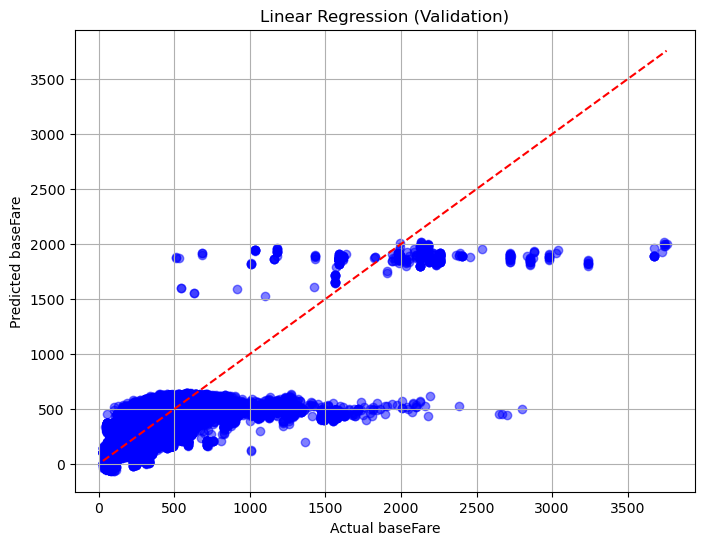

flightDate_as_int           1.533449e+12
totalTransferTime           4.002295e+11
totalFlightTime             2.758957e+11
relAirbus                   2.067059e+11
relBoeing                   2.026633e+11
relOthers                   1.157860e+11
destinationAirport_LGA      6.163606e+10
destinationAirport_BOS      6.127862e+10
destinationAirport_JFK      5.949278e+10
destinationAirport_EWR      5.800584e+10
destinationAirport_ATL      5.756098e+10
destinationAirport_CLT      5.686677e+10
destinationAirport_DTW      5.510956e+10
destinationAirport_ORD      5.286905e+10
destinationAirport_IAD      5.154726e+10
destinationAirport_DFW      5.144976e+10
destinationAirport_DEN      5.052788e+10
destinationAirport_MIA      5.034665e+10
destinationAirport_PHL      5.005766e+10
destinationAirport_SFO      4.827833e+10
destinationAirport_OAK      3.404557e+10
departureHour               4.457268e+01
dayOfWeekNum                1.976785e+01
seatsRemaining              1.180577e+01
is_holiday      

In [9]:
# Linear Regression: Predicted vs Actual
y_pred_lr = lr.predict(X_test_scaled)

y_pred_val_lr = lr.predict(X_val_scaled)
plot_prediction(y_val, y_pred_val_lr, "Linear Regression (Validation)", "blue")
coeficientes = pd.Series(lr.coef_, index=X_train.columns)
print(coeficientes.sort_values(ascending=False))

In [10]:
# Linear Regression: Evaluation
mae_lr, rmse_lr, r2_lr = evaluate_model(lr, X_val_scaled, y_val)

print("[Linear Regression - Validation]")
print(f"MAE: {mae_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}\n")

[Linear Regression - Validation]
MAE: 87.5575
RMSE: 122.5686
R² Score: 0.4491



C:\Users\Mats\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Linear Regression: Evaluation on test set

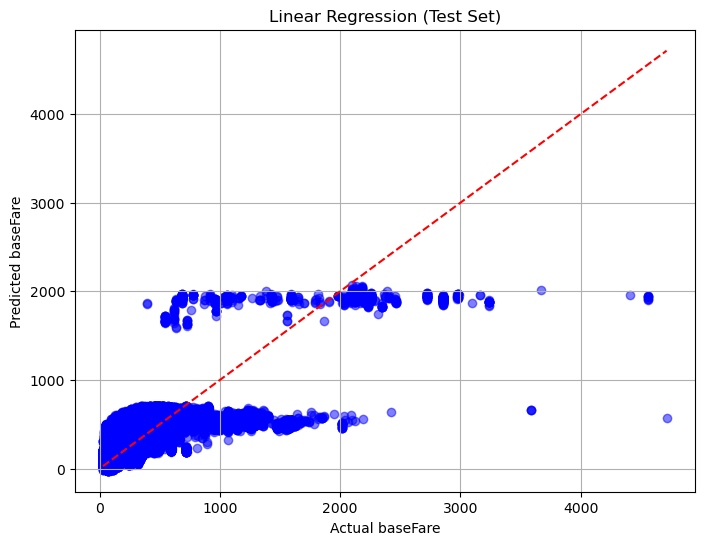

In [12]:
# Linear Regression: Test Set Prediction
y_pred_lr = lr.predict(X_test_scaled)

plot_prediction(y_test, y_pred_lr, "Linear Regression (Test Set)", "blue")

In [13]:
# Linear Regression: Final Evaluation on Test Set
mae_lr, rmse_lr, r2_lr = evaluate_model(lr, X_test_scaled, y_test)

print("[Linear Regression - Test set]")
print(f"MAE: {mae_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}\n")

[Linear Regression - Test set]
MAE: 151.1093
RMSE: 177.6682
R² Score: -0.4357



C:\Users\Mats\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Ridge Regression

In [15]:
# 3. Ridge Regression with GridSearch
ridge = Ridge(max_iter=1000)
ridge_params = {'alpha': np.logspace(-3, 3, 15)}

grid_ridge = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_absolute_error',n_jobs=-1)
grid_ridge.fit(X_train_scaled, y_train)

best_ridge = grid_ridge.best_estimator_

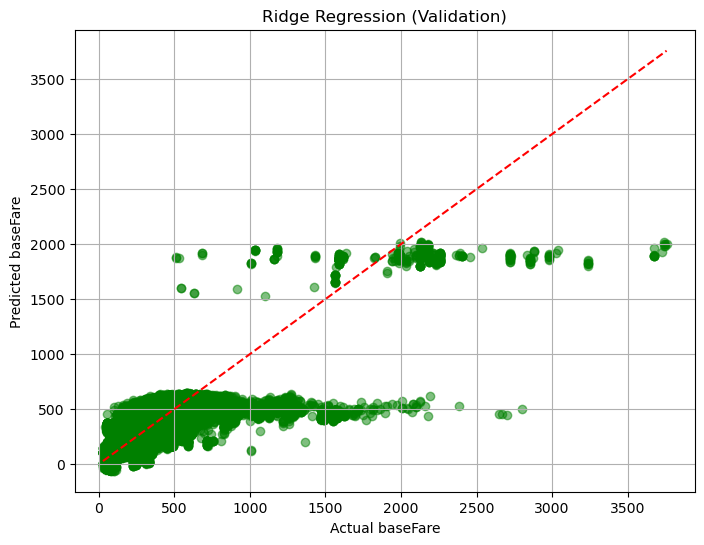

In [16]:
# Ridge Regression: Predicted vs Actual
y_pred_val_ridge = best_ridge.predict(X_val_scaled)
plot_prediction(y_val, y_pred_val_ridge, "Ridge Regression (Validation)", "green")


In [17]:
# Ridge Regression: Evaluation
mae_ridge, rmse_ridge, r2_ridge = evaluate_model(best_ridge, X_val_scaled, y_val)

print("[Ridge Regression - Validation]")
print(f"Best Alpha: {grid_ridge.best_params_['alpha']:.6f}")
print(f"MAE: {mae_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")

[Ridge Regression - Validation]
Best Alpha: 7.196857
MAE: 87.8779
RMSE: 122.7708
R² Score: 0.4473


C:\Users\Mats\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Ridge Regression: Evaluation on test set

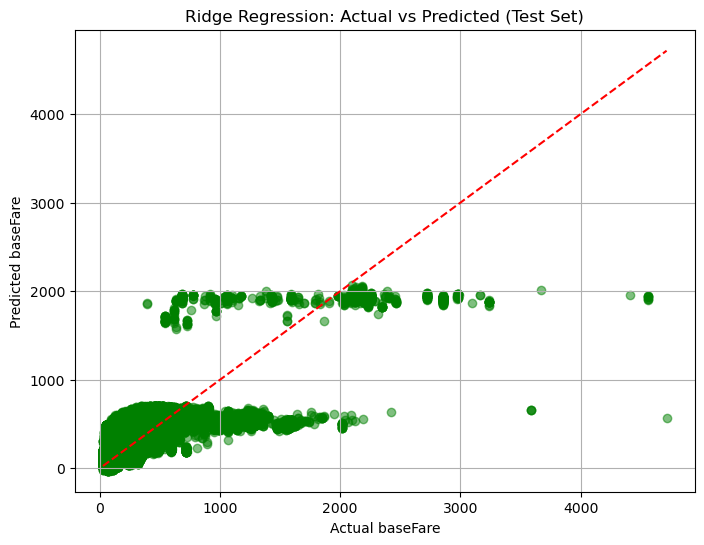

In [19]:
# Ridge Regression: Test Set Prediction
y_pred_ridge = best_ridge.predict(X_test_scaled)
plot_prediction(y_test, y_pred_ridge, "Ridge Regression: Actual vs Predicted (Test Set)", "green")

In [20]:
# Ridge Regression: Final Evaluation on Test Set
mae_ridge, rmse_ridge, r2_ridge = evaluate_model(best_ridge, X_test_scaled, y_test)

print("[Ridge Regression - Test set]")
print(f"Best Alpha: {grid_ridge.best_params_['alpha']:.6f}")
print(f"MAE: {mae_ridge:.4f}")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")

[Ridge Regression - Test set]
Best Alpha: 7.196857
MAE: 149.3892
RMSE: 176.0934
R² Score: -0.4104


C:\Users\Mats\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Polynomial regression

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_train_scaled = X_train_scaled.astype(np.float32)
X_val_scaled = X_val_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)

k = 30
selector = SelectKBest(score_func=f_regression, k=k)
X_train_reduced = selector.fit_transform(X_train_scaled, y_train)
X_val_reduced = selector.transform(X_val_scaled)
X_test_reduced = selector.transform(X_test_scaled)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_reduced)
X_val_poly = poly.transform(X_val_reduced)
X_test_poly = poly.transform(X_test_reduced)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_val_poly = poly_reg.predict(X_val_poly)
mae_poly_val = mean_absolute_error(y_val, y_pred_val_poly)
rmse_poly_val = mean_squared_error(y_val, y_pred_val_poly, squared=False)
r2_poly_val = r2_score(y_val, y_pred_val_poly)

print("\n[Polynomial Regression - Validation]")
print(f"MAE: {mae_poly_val:.4f}")
print(f"RMSE: {rmse_poly_val:.4f}")
print(f"R² Score: {r2_poly_val:.4f}")

y_pred_test_poly = poly_reg.predict(X_test_poly)
mae_poly_test = mean_absolute_error(y_test, y_pred_test_poly)
rmse_poly_test = mean_squared_error(y_test, y_pred_test_poly, squared=False)
r2_poly_test = r2_score(y_test, y_pred_test_poly)

print("\n[Polynomial Regression - Test Set]")
print(f"MAE: {mae_poly_test:.4f}")
print(f"RMSE: {rmse_poly_test:.4f}")
print(f"R² Score: {r2_poly_test:.4f}")

C:\Users\Mats\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



[Polynomial Regression - Validation]
MAE: 82.2369
RMSE: 119.2073
R² Score: 0.4789

[Polynomial Regression - Test Set]
MAE: 125.9830
RMSE: 170.6009
R² Score: -0.3238


C:\Users\Mats\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Lasso Regression

C:\Users\Mats\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.235e+10, tolerance: 8.171e+06
  model = cd_fast.enet_coordinate_descent(


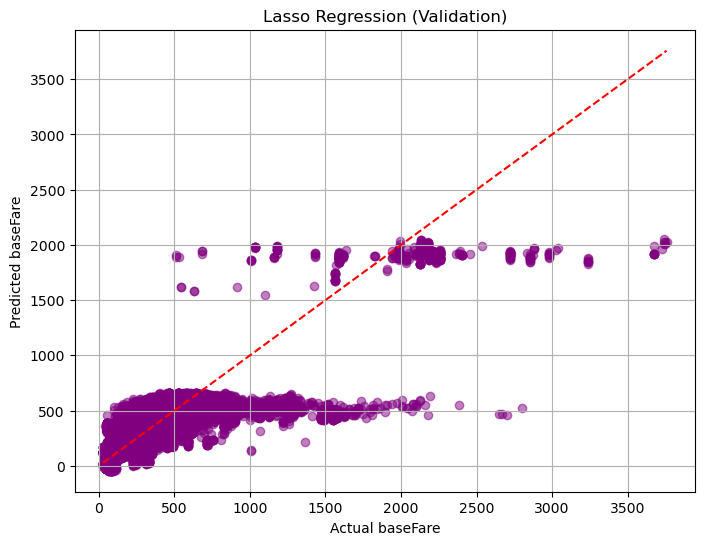


[Lasso Regression - Validation]
Best Alpha: 0.001000
MAE: 94.1503
RMSE: 127.2560
R² Score: 0.4062


C:\Users\Mats\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [24]:
# Lasso Regression with GridSearchCV
lasso2 = Lasso(max_iter=1000)  # Lowered from 10000 unless needed
lasso_params2 = {'alpha': np.logspace(-3, 0, 10)}  # Fewer points for efficiency

grid_lasso2 = GridSearchCV(lasso2, lasso_params2, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_lasso2.fit(X_train_scaled, y_train)

best_lasso2 = grid_lasso2.best_estimator_

# Predictions
y_pred_val_lasso2 = best_lasso2.predict(X_val_scaled)
plot_prediction(y_val, y_pred_val_lasso2, "Lasso Regression (Validation)", "purple")

# Evaluation
mae_lasso2, rmse_lasso2, r2_lasso2 = evaluate_model(best_lasso2, X_val_scaled, y_val)

# Output
print("\n[Lasso Regression - Validation]")
print(f"Best Alpha: {grid_lasso2.best_params_['alpha']:.6f}")
print(f"MAE: {mae_lasso2:.4f}")
print(f"RMSE: {rmse_lasso2:.4f}")
print(f"R² Score: {r2_lasso2:.4f}")

### Lasso Regression: Evaluation on test set

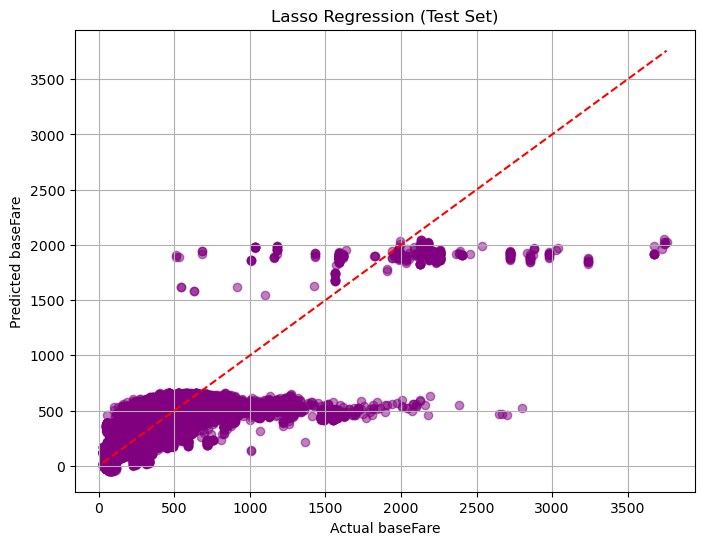

In [26]:
# Lasso Regression: Predicted vs Actual
y_pred_val_lasso2 = best_lasso2.predict(X_val_scaled)
plot_prediction(y_val, y_pred_val_lasso2, "Lasso Regression (Test Set)", "purple")

In [27]:
# Lasso Regression: Final Evaluation on Test Set
mae_lasso2, rmse_lasso2, r2_lasso2 = evaluate_model(best_lasso2, X_test_scaled, y_test)

print("\n[Lasso Regression - Test set]")
print(f"Best Alpha: {grid_lasso2.best_params_['alpha']:.6f}")
print(f"MAE: {mae_lasso2:.4f}")
print(f"RMSE: {rmse_lasso2:.4f}")
print(f"R² Score: {r2_lasso2:.4f}")


[Lasso Regression - Test set]
Best Alpha: 0.001000
MAE: 123.4647
RMSE: 152.5882
R² Score: -0.0590


C:\Users\Mats\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
